In [7]:
from utils import *
import numpy as np

# Clasificarea irisilor in functie de specie - k-means - my code

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

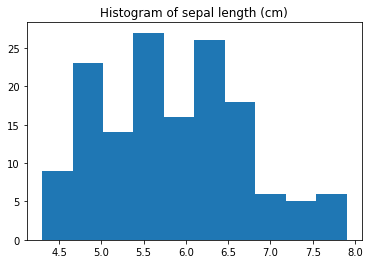

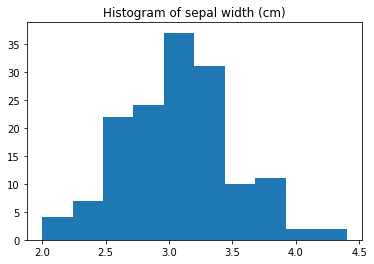

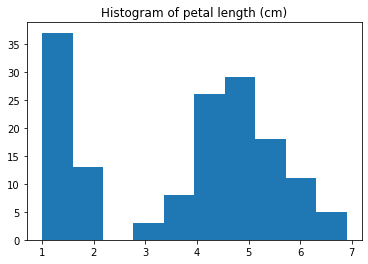

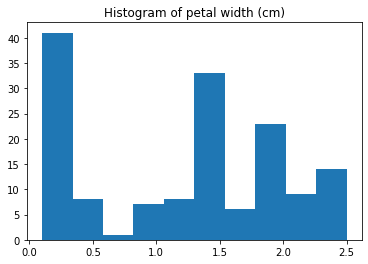

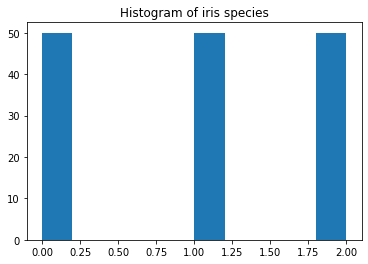

In [8]:
from sklearn.datasets import load_iris
data = load_iris()
inputs = data['data']
outputs = data['target']
outputNames = data['target_names']
featureNames = list(data['feature_names'])
features = [[feat[i] for feat in inputs] for i in range(len(featureNames))]
inputs = [[features[i][j] for i in range(len(featureNames))] for j in range(len(inputs))]

# plot the data distribution
for i in range(len(featureNames)):
    plot_data_histograms(features[i], featureNames[i])
plot_data_histograms(outputs, 'iris species')

### Pasul 2 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [9]:
# impratirea datelor in date de antrenament si date de validare
train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, outputs, 0.8)

# normalizarea datelor
# train_inputs, validation_inputs = normalisation(train_inputs, validation_inputs)

### Pasul 3 - Invatare model

In [10]:
from MyKMeans import MyKMeans
classifier = MyKMeans(no_clusters=3)
classifier.fit(train_inputs)

### Pasul 4 - Testarea datelor de validare

In [11]:
validation_outputs = [featureNames[value] for value in validation_outputs]
computedTestOutputs = classifier.predict(validation_inputs)
featureNames = get_labels(computedTestOutputs, validation_outputs, featureNames)
computedTestOutputs = [featureNames[value] for value in computedTestOutputs]

### Pasul 5 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy - by tool: 0.9333333333333333


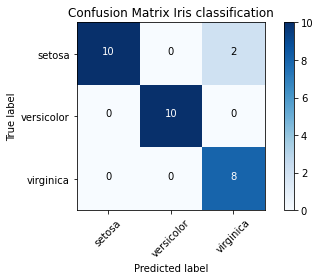

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(validation_outputs, computedTestOutputs)
print('Accuracy - by tool:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(validation_outputs, computedTestOutputs)
plot_confusion_matrix(cm, outputNames, 'Iris classification')